In [34]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
records = [
    {
        'system': 'arxiv',
        'alpha': 6839,
        'beta': 2080,
        'overlap': 502
    },
    {
        'system': 'celegans',
        'alpha': 406,
        'beta': 777,
        'overlap': 111
    },
    {
        'system': 'drosophila',
        'alpha': 23911,
        'beta': 1798,
        'overlap': 66
    },
    {
        'system': 'london',
        'alpha': 83,
        'beta': 46,
        'overlap': 0
    }
]

df = pd.DataFrame.from_records(records)

In [19]:
df['imbalance'] = df['alpha'] / (df['alpha'] + df['beta'])
df['overlap'] = df['overlap'] / (df['alpha'] + df['beta'])

<Figure size 640x480 with 0 Axes>

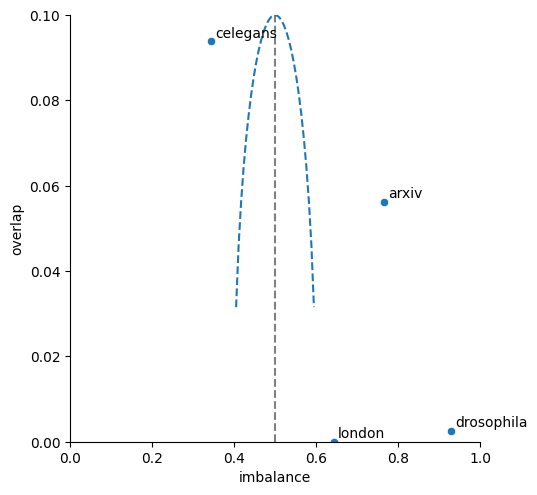

In [37]:
plt.figure()

g = sns.relplot(
    data=df, kind='scatter',
    x='imbalance',
    y='overlap'
)
g.refline(x=0.5)

g.set(xlim=(0,1))
g.set(ylim=(0,0.1))

x_ = np.linspace(0.35, 0.65)
y_ = [np.sqrt(0.1**2 - (x-0.5)**2) for x in x_]
plt.plot(x_, y_, linestyle="--")


for _, row in df.iterrows():
    plt.text(row['imbalance']+0.01, row['overlap']+0.001, row['system'])